<a href="https://colab.research.google.com/github/nkashanov/DS/blob/main/07_misc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.stats.proportion import proportions_ztest

# Modeled p-value vs Actual p-value

In [3]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(10,0.5))

In [4]:
df = pd.DataFrame(result)

In [5]:
df['dev'] = abs(df[0] - 5)

In [6]:
df

,0,dev
0,5,0
1,5,0
2,5,0
3,5,0
4,8,3
...,...,...
9995,5,0
9996,6,1
9997,2,3
9998,4,1


In [7]:
devs = [0,1,2,3,4,5]

In [8]:
result = []
for dev in devs:
  result.append((dev,(df['dev'] >= dev).mean()))

In [9]:
pvals = pd.DataFrame(result,columns=['heads','p-values'])

In [10]:
pvals

,heads,p-values
0,0,1.0000
1,1,0.7573
2,2,0.3515
3,3,0.1124
4,4,0.0229
5,5,0.0009


In [11]:
pvals['pval_ztest'] = pvals['heads'].apply(lambda x: proportions_ztest(5-x,10,0.5,alternative='two-sided')[1])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [12]:
pvals

,heads,p-values,pval_ztest
0,0,1.0000,1.000000
1,1,0.7573,0.518605
2,2,0.3515,0.167546
3,3,0.1124,0.017706
4,4,0.0229,0.000025
5,5,0.0009,0.000000


<Axes: xlabel='heads'>

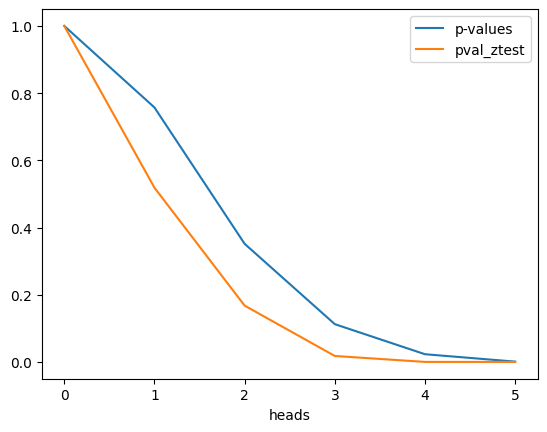

In [13]:
pvals.set_index('heads').plot()

# Desired FPR vs actual FPR

## Sample size 10

In [14]:
df

,0,dev
0,5,0
1,5,0
2,5,0
3,5,0
4,8,3
...,...,...
9995,5,0
9996,6,1
9997,2,3
9998,4,1


расчитываем потенциальный FPR (p-value)

In [15]:
df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,0.017706
...,...
9995,1.000000
9996,0.518605
9997,0.017706
9998,0.518605


сравниваем с 0.05

In [21]:
df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1]) < 0.05

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1024: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)


,0
0,True
1,True
2,True
3,True
4,False
...,...
9995,True
9996,False
9997,False
9998,True


значит фактический FPR тоже должен не превышать 5%

In [17]:
(df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1]) < 0.05).mean()

0.1124

хотя фактический 11%, здесь и видим что мы не можем использовать z_test

тк sample_size = 10

## Sample size 20

In [18]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(20,0.5))

In [19]:
df = pd.DataFrame(result)

In [23]:
(df[0].apply(lambda x: proportions_ztest(x, 20,0.5,alternative='two-sided')[1]) < 0.05).mean()

0.0447

сравнение фактического с желаемым FPR

дает ответ на вопрос

С помощью Монте-Карло генерируем виртуальные эксперименты, затем проверяем соотвествие фактического желаемому